/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



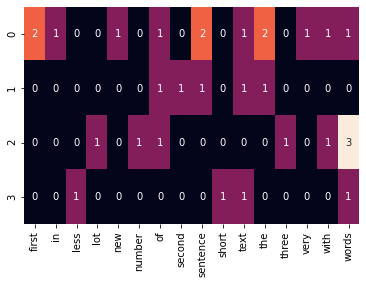

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# create CountVectorizer object
vectorizer = CountVectorizer()
corpus = [
          'Text of the very first new sentence with the first words in sentence.',
          'Text of the second sentence.',
          'Number three with lot of words words words.',
          'Short text, less words.',
]
# learn the vocabulary and store CountVectorizer sparse matrix in term_frequencies
term_frequencies = vectorizer.fit_transform(corpus) 
vocab = vectorizer.get_feature_names()
# convert sparse matrix to numpy array
term_frequencies = term_frequencies.toarray()
# visualize term frequencies 
import seaborn as sns
sns.heatmap(term_frequencies, annot=True, cbar = False, xticklabels = vocab);

In [ ]:
corpus

['Text of the very first new sentence with the first words in sentence.',
 'Text of the second sentence.',
 'Number three with lot of words words words.',
 'Short text, less words.']

In [ ]:
# learn the vocabulary and store CountVectorizer sparse matrix in term_frequencies
term_frequencies = vectorizer.fit_transform(corpus) 
vocab = vectorizer.get_feature_names()
vocab

['first',
 'in',
 'less',
 'lot',
 'new',
 'number',
 'of',
 'second',
 'sentence',
 'short',
 'text',
 'the',
 'three',
 'very',
 'with',
 'words']

In [ ]:
term_frequencies = term_frequencies.toarray() # convert sparse matrix to numpy array
term_frequencies

array([[2, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 3],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1]])

In [ ]:
# Convert another document with countvectorizing
vectorizer.transform(['A new new sentence.']).toarray()

array([[0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

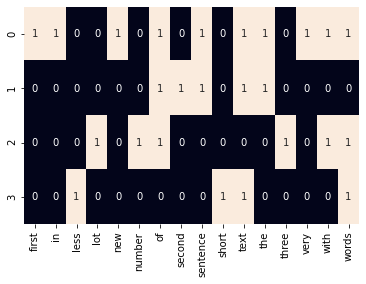

In [ ]:
one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()


sns.heatmap(one_hot, annot=True, cbar = False, xticklabels = vocab)

In [ ]:
one_hot

array([[1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1]])

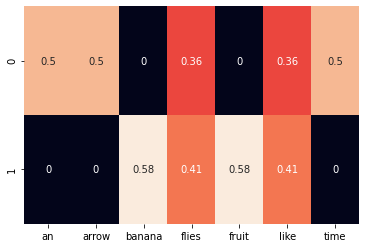

In [ ]:
# idf
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
corpus = [
          'Time flies like an arrow.',
          'Fruit flies like a banana.'
]
vocab = ['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time']
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(tfidf, annot=True, cbar = False, xticklabels = vocab)

In [ ]:
tfidf

array([[0.49922133, 0.49922133, 0.        , 0.35520009, 0.        ,
        0.35520009, 0.49922133],
       [0.        , 0.        , 0.57615236, 0.40993715, 0.57615236,
        0.40993715, 0.        ]])

In [ ]:
# Download Google Word2Vec embeddings https://code.google.com/archive/p/word2vec/
!wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
!gunzip GoogleNews-vectors-negative300.bin
# Try Word2Vec with Gensim
import gensim
# Load pretrained vectors from Google
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
king = model['king']
# king - man + woman = queen
print(model.most_similar(positive=['woman', 'king'], negative=['man']))

--2020-08-11 00:56:28--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.50.44
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.50.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  34.9MB/s    in 46s     

2020-08-11 00:57:15 (34.1 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('queen', 0.7118192911148071), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321243286133), ('kings', 0.5236844420433044), ('Queen_Consort', 0.5235945582389832), ('queens', 0.518113374710083), ('sultan', 0.5098593235015869), ('monarchy', 0.5087411999702454)]


In [ ]:
print(model.similarity('woman', 'man'))

0.76640123


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
print(model.similarity('king', 'woman'))

0.12847973


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
# Try Glove word embeddings with Spacy
!python3 -m spacy download en_core_web_lg
import spacy
# Load the spacy model that you have installed
import en_core_web_lg
nlp = en_core_web_lg.load()
# process a sentence using the model
doc = nlp("man king stands on the carpet and sees woman queen")

     |████████████████████████████████| 827.9MB 1.3MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=98d6d15ce259afca7b1670eea38ac4d3eaa998a84df346a8787def189f6fc888
  Stored in directory: /tmp/pip-ephem-wheel-cache-ryif85fx/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
doc[1].similarity(doc[9])

0.72526103

In [ ]:
doc[1].similarity(doc[5])

0.20431946

In [ ]:
v =  doc[1].vector - (doc[0].vector*2) + (doc[8].vector*2)
from scipy.spatial import distance
import numpy as np
# Format the vocabulary for use in the distance function
vectors = [token.vector for token in doc]
vectors = np.array(vectors)
# Find the closest word below 
closest_index = distance.cdist(np.expand_dims(v, axis = 0), vectors, metric = 'cosine').argmin()
output_word = doc[closest_index].text
print(output_word)

queen


In [ ]:
!pip install Cython --install-option="--no-cython-compile"
!pip install fasttext
# download pre-trained language word vectors from one of 157 languges  https://fasttext.cc/docs/en/crawl-vectors.html
# it will take some time, about 5 minutes
import fasttext
import fasttext.util
fasttext.util.download_model('en', if_exists='ignore')  # English
ft = fasttext.load_model('cc.en.300.bin')

/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
     |████████████████████████████████| 71kB 4.4MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3018808 sha256=9330b1275d95593a7b38d63046b01153d5eea0e3fa5dd36871631a6f03265c10
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext



In [ ]:
# use tensorflow 1.x for ELMo, because trere are still no ELMo for tensorflow 2.0
%tensorflow_version 1.x
import tensorflow_hub as hub
import tensorflow as tf
# Download pretrained ELMo model from Tensorflow Hub https://tfhub.dev/google/elmo/3
elmo = hub.Module("https://tfhub.dev/google/elmo/3", trainable=True)
sentences =  \
['king arthur, also called arthur or aathur pendragon, legendary british king who appears in a cycle of \
medieval romances (known as the matter of britain) as the sovereign of a knightly fellowship of the round table.', 
'it is not certain how these legends originated or whether the figure of arthur was based on a historical person.', 
'the legend possibly originated either in wales or in those parts of northern britain inhabited by brythonic-speaking celts.', 
'for a fuller treatment of the stories about king arthur, see also arthurian legend.']

TensorFlow 1.x selected.


In [ ]:
words = []
mask = []
masked_words = []
for sent in sentences:
  splitted = sent.split()
  for i in range(36):
    try:
      words.append(splitted[i])
    except:
      words.append('_')
for word in words:
  if word == "_":
    mask.append(False)
  else:
    mask.append(True)
    masked_words.append(word)

In [ ]:
embeddings = elmo(
    sentences,
    signature="default",
    as_dict=True)["elmo"]

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [ ]:
%%time
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  sess.run(tf.tables_initializer())
  x = sess.run(embeddings)
embs = x.reshape(-1, 1024)
masked_embs = embs[mask]

CPU times: user 4.79 s, sys: 718 ms, total: 5.51 s
Wall time: 3.62 s


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
y = pca.fit_transform(masked_embs)
from sklearn.manifold import TSNE
y = TSNE(n_components=2).fit_transform(y)
import plotly as py
import plotly.graph_objs as go
data = [
    go.Scatter(
        x=[i[0] for i in y],
        y=[i[1] for i in y],
        mode='markers',
        text=[i for i in masked_words],
    marker=dict(
        size=16,
        color = [len(i) for i in masked_words], #set color equal to a variable
        opacity= 0.8,
        colorscale='Viridis',
        showscale=False
    )
    )
]
layout = go.Layout()
layout = dict(
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )
fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
!pip install transformers

     |████████████████████████████████| 778kB 6.3MB/s 
     |████████████████████████████████| 3.0MB 20.7MB/s 
     |████████████████████████████████| 1.1MB 27.8MB/s 
     |████████████████████████████████| 890kB 28.0MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=bcb69b898598c091c2715d9d5ca2039031d180d8fd624647a7bd6ae3e628ba4b
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
import torch
torch.manual_seed(0)
from transformers import BertTokenizer, BertModel
import logging
import matplotlib.pyplot as plt
% matplotlib inline
# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [ ]:
sentences =  \
['king arthur, also called arthur or aathur pendragon, legendary british king who appears in a cycle of \
medieval romances (known as the matter of britain) as the sovereign of a knightly fellowship of the round table.', 
'it is not certain how these legends originated or whether the figure of arthur was based on a historical person.', 
'the legend possibly originated either in wales or in those parts of northern britain inhabited by brythonic-speaking celts.', 
'for a fuller treatment of the stories about king arthur, see also arthurian legend.']
# Print the original sentence.
print(' Original: ', sentences[0][:99])
# Print the sentence splitted into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0])[:15])
# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0]))[:15])

 Original:  king arthur, also called arthur or aathur pendragon, legendary british king who appears in a cycle 
Tokenized:  ['king', 'arthur', ',', 'also', 'called', 'arthur', 'or', 'aa', '##th', '##ur', 'pen', '##dra', '##gon', ',', 'legendary']
Token IDs:  [2332, 4300, 1010, 2036, 2170, 4300, 2030, 9779, 2705, 3126, 7279, 7265, 7446, 1010, 8987]


In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []
tokenized_texts = []


for sent in sentences:
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        truncation=True,
                        max_length = 48,           # Pad & truncate all sentences.
                        pad_to_max_length = True,                        
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Save tokens from sentence as a separate array. We will use it later to explore and compare embeddings.
    marked_text = "[CLS] " + sent + " [SEP]"
    tokenized_texts.append(tokenizer.tokenize(marked_text))
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])

# Convert the list into tensor.
input_ids = torch.cat(input_ids, dim=0)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  king arthur, also called arthur or aathur pendragon, legendary british king who appears in a cycle of medieval romances (known as the matter of britain) as the sovereign of a knightly fellowship of the round table.
Token IDs: tensor([  101,  2332,  4300,  1010,  2036,  2170,  4300,  2030,  9779,  2705,
         3126,  7279,  7265,  7446,  1010,  8987,  2329,  2332,  2040,  3544,
         1999,  1037,  5402,  1997,  5781,  7472,  2015,  1006,  2124,  2004,
         1996,  3043,  1997,  3725,  1007,  2004,  1996, 11074,  1997,  1037,
         5000,  2135,  7881,  1997,  1996,  2461,  2795,   102])


In [ ]:
segments_ids = torch.ones_like(input_ids)

In [ ]:
model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # Whether the model returns all hidden-states.
                                  )
model.eval();

In [ ]:
with torch.no_grad():

    outputs = model(input_ids, segments_ids)

    # Evaluating the model will return a different number of objects based on 
    # how it's  configured in the `from_pretrained` call earlier. In this case, 
    # becase we set `output_hidden_states = True`, the third item will be the 
    # hidden states from all layers. See the documentation for more details:
    # https://huggingface.co/transformers/model_doc/bert.html#bertmodel
    hidden_states = outputs[2]

In [ ]:
print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
print ("Number of batches:", len(hidden_states[0]))
print ("Number of tokens:", len(hidden_states[0][0]))
print ("Number of hidden units:", len(hidden_states[0][0][0]))

Number of layers: 13   (initial embeddings + 12 BERT layers)
Number of batches: 4
Number of tokens: 48
Number of hidden units: 768


In [ ]:
# Concatenate the tensors for all layers. We use `stack` here to
# create a new dimension in the tensor.
token_embeddings = torch.stack(hidden_states, dim=0)

token_embeddings.size()

torch.Size([13, 4, 48, 768])

In [ ]:
# Swap dimensions, so we get tensors in format: [sentence, tokens, hidden layes, features]
token_embeddings = token_embeddings.permute(1,2,0,3)

token_embeddings.size()

torch.Size([4, 48, 13, 768])

In [ ]:
# we will use last four hidden layers to create each word embedding

processed_embeddings = token_embeddings[:, :, 9:, :]
processed_embeddings.shape

torch.Size([4, 48, 4, 768])

In [ ]:
# Concatenate four layers for each token to create embeddings

embeddings = torch.reshape(processed_embeddings, (4, 48, -1))
embeddings.shape

torch.Size([4, 48, 3072])

In [ ]:
for i, token_str in enumerate(tokenized_texts[0]):
  print (i, token_str)

0 [CLS]
1 king
2 arthur
3 ,
4 also
5 called
6 arthur
7 or
8 aa
9 ##th
10 ##ur
11 pen
12 ##dra
13 ##gon
14 ,
15 legendary
16 british
17 king
18 who
19 appears
20 in
21 a
22 cycle
23 of
24 medieval
25 romance
26 ##s
27 (
28 known
29 as
30 the
31 matter
32 of
33 britain
34 )
35 as
36 the
37 sovereign
38 of
39 a
40 knight
41 ##ly
42 fellowship
43 of
44 the
45 round
46 table
47 .
48 [SEP]


In [ ]:
from scipy.spatial.distance import cosine
 
kings = cosine(embeddings[0][1], embeddings[0][17])
king_table = cosine(embeddings[0][1], embeddings[0][46])
king_archtur = cosine(embeddings[0][2], embeddings[0][1])
 
print('Distance for two kings:  %.2f' % kings)
print('Distance from king to table:  %.2f' % king_table)
print('Distance from Archtur to king:  %.2f' % king_archtur)

Distance for two kings:  0.21
Distance from king to table:  0.73
Distance from Archtur to king:  0.40


In [ ]:
!pip install simplerepresentations

  Created wheel for simplerepresentations: filename=simplerepresentations-0.0.4-cp36-none-any.whl size=8439 sha256=37c1e87cb219578af98eda2259c0c3b32b9688500f362c273013f6ced24e6308
  Stored in directory: /root/.cache/pip/wheels/ab/cd/ab/6ba46ab4845442abb114bf92136a0d760151de2ccfb3af4d7d
Successfully built simplerepresentations


In [ ]:
import torch
from simplerepresentations import RepresentationModel
torch.manual_seed(0)

model_type = 'bert'
model_name = 'bert-base-uncased'

representation_model = RepresentationModel(
		model_type=model_type,
		model_name=model_name,
		batch_size=4,
		max_seq_length=48, # truncate sentences to be less than or equal to 48 tokens
		combination_method='cat', # concatenate the last `last_hidden_to_use` hidden states
		last_hidden_to_use=4 # use the last 4 hidden states to build tokens representations
	)

text_a = sentences

all_sentences_representations, all_tokens_representations = representation_model(text_a=text_a)

print(all_sentences_representations.shape) # (4, 768) => (number of sentences, hidden size)
print(all_tokens_representations.shape) # (4, 48, 3072) => (number of sentences, number of tokens, hidden size)

Converting to features started.



(4, 768)
(4, 48, 3072)


In [ ]:
from scipy.spatial.distance import cosine

kings = cosine(all_tokens_representations[0][1], all_tokens_representations[0][17])
king_table = cosine(all_tokens_representations[0][1], all_tokens_representations[0][46])
king_archtur = cosine(all_tokens_representations[0][2], all_tokens_representations[0][1])

print('Distance for two kings:  %.2f' % kings)
print('Distance from king to table:  %.2f' % king_table)
print('Distance from Archtur to king:  %.2f' % king_archtur)

Distance for two kings:  0.21
Distance from king to table:  0.73
Distance from Archtur to king:  0.40
